In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
subtract_data = pd.read_csv('./processed/subtraction/subtract_results.csv', index_col=0)

In [3]:
index_list = list(subtract_data.index.values)
subtract_data["order"] = None

for i in range(len(index_list)):
    temp_idx = index_list[i]
    temp_value = int(index_list[i][4:])
    subtract_data.loc[temp_idx, "order"] = temp_value

subtract_sort = subtract_data.sort_values(by="order")
subtract_sort

,S01_HIS_164,S05_HIS_164,p12_HIS_164,p13_HIS_164,S05-S01,p12-S01,p13-S01,order
ARG_4,-0.066946,-0.004251,0.040482,0.256907,0.062696,0.107429,0.323853,4
LYS_5,-0.037425,-0.062256,-0.083294,0.012873,-0.024831,-0.045870,0.050298,5
LYS_12,-0.030530,-0.023788,0.060485,0.229203,0.006741,0.091014,0.259732,12
GLU_14,-0.024064,-0.039563,-0.121027,-0.197333,-0.015499,-0.096963,-0.173270,14
CYS_16,0.031140,-0.059656,-0.085125,-0.002211,-0.090797,-0.116265,-0.033351,16
...,...,...,...,...,...,...,...,...
ASP_595,-0.006938,0.022714,-0.068131,-0.082943,0.029652,-0.061193,-0.076006,595
GLU_596,0.018596,-0.013250,-0.052459,-0.166297,-0.031847,-0.071055,-0.184893,596
ASP_601,-0.100099,0.061259,0.329393,-0.165794,0.161357,0.429492,-0.065696,601
ARG_604,0.069052,-0.085467,-0.402560,-0.106439,-0.154519,-0.471612,-0.175491,604


In [4]:
subtract_sort.to_csv('./processed/sort_data.csv')

In [48]:
S05_S01_data = subtract_sort[["S01_HIS_164", "S05_HIS_164", "S05-S01"]]
p12_S01_data = subtract_sort[["S01_HIS_164", "p12_HIS_164", "p12-S01"]]
p13_S01_data = subtract_sort[["S01_HIS_164", "p13_HIS_164", "p13-S01"]]

S05_S01_filter = S05_S01_data[(S05_S01_data["S05-S01"] > 0.1) |
                              (S05_S01_data["S05-S01"] < -0.1)]
p12_S01_filter = p12_S01_data[(p12_S01_data["p12-S01"] > 0.1) |
                              (p12_S01_data["p12-S01"] < -0.1)]
p13_S01_filter = p13_S01_data[(p13_S01_data["p13-S01"] > 0.1) |
                              (p13_S01_data["p13-S01"] < -0.1)]

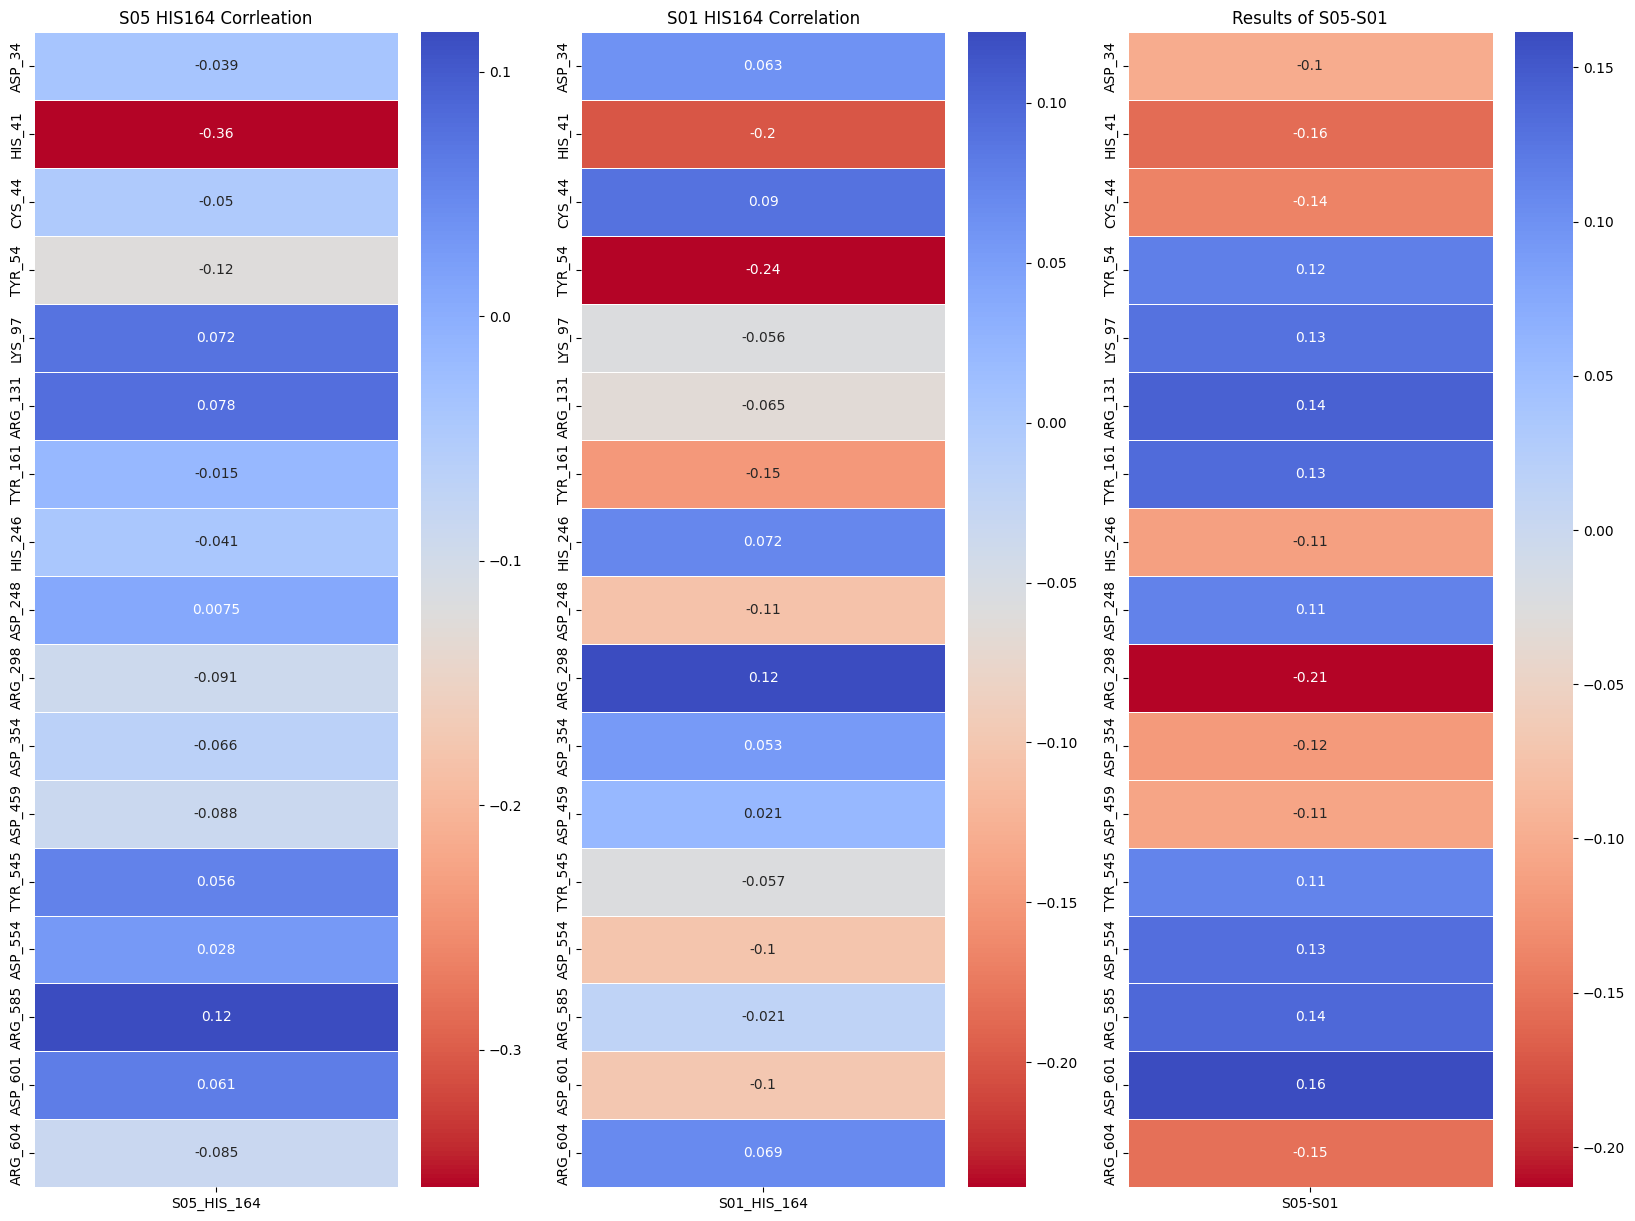

In [64]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plot=sns.heatmap(S05_S01_filter[["S05_HIS_164"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("S05 HIS164 Corrleation")

plt.subplot(1, 3, 2)
plot=sns.heatmap(S05_S01_filter[["S01_HIS_164"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("S01 HIS164 Correlation")

plt.subplot(1, 3, 3)
plot=sns.heatmap(S05_S01_filter[["S05-S01"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("Results of S05-S01")

plt.savefig('./figure/subtraction_example/S05_subtraction_S01.png')
plt.show()

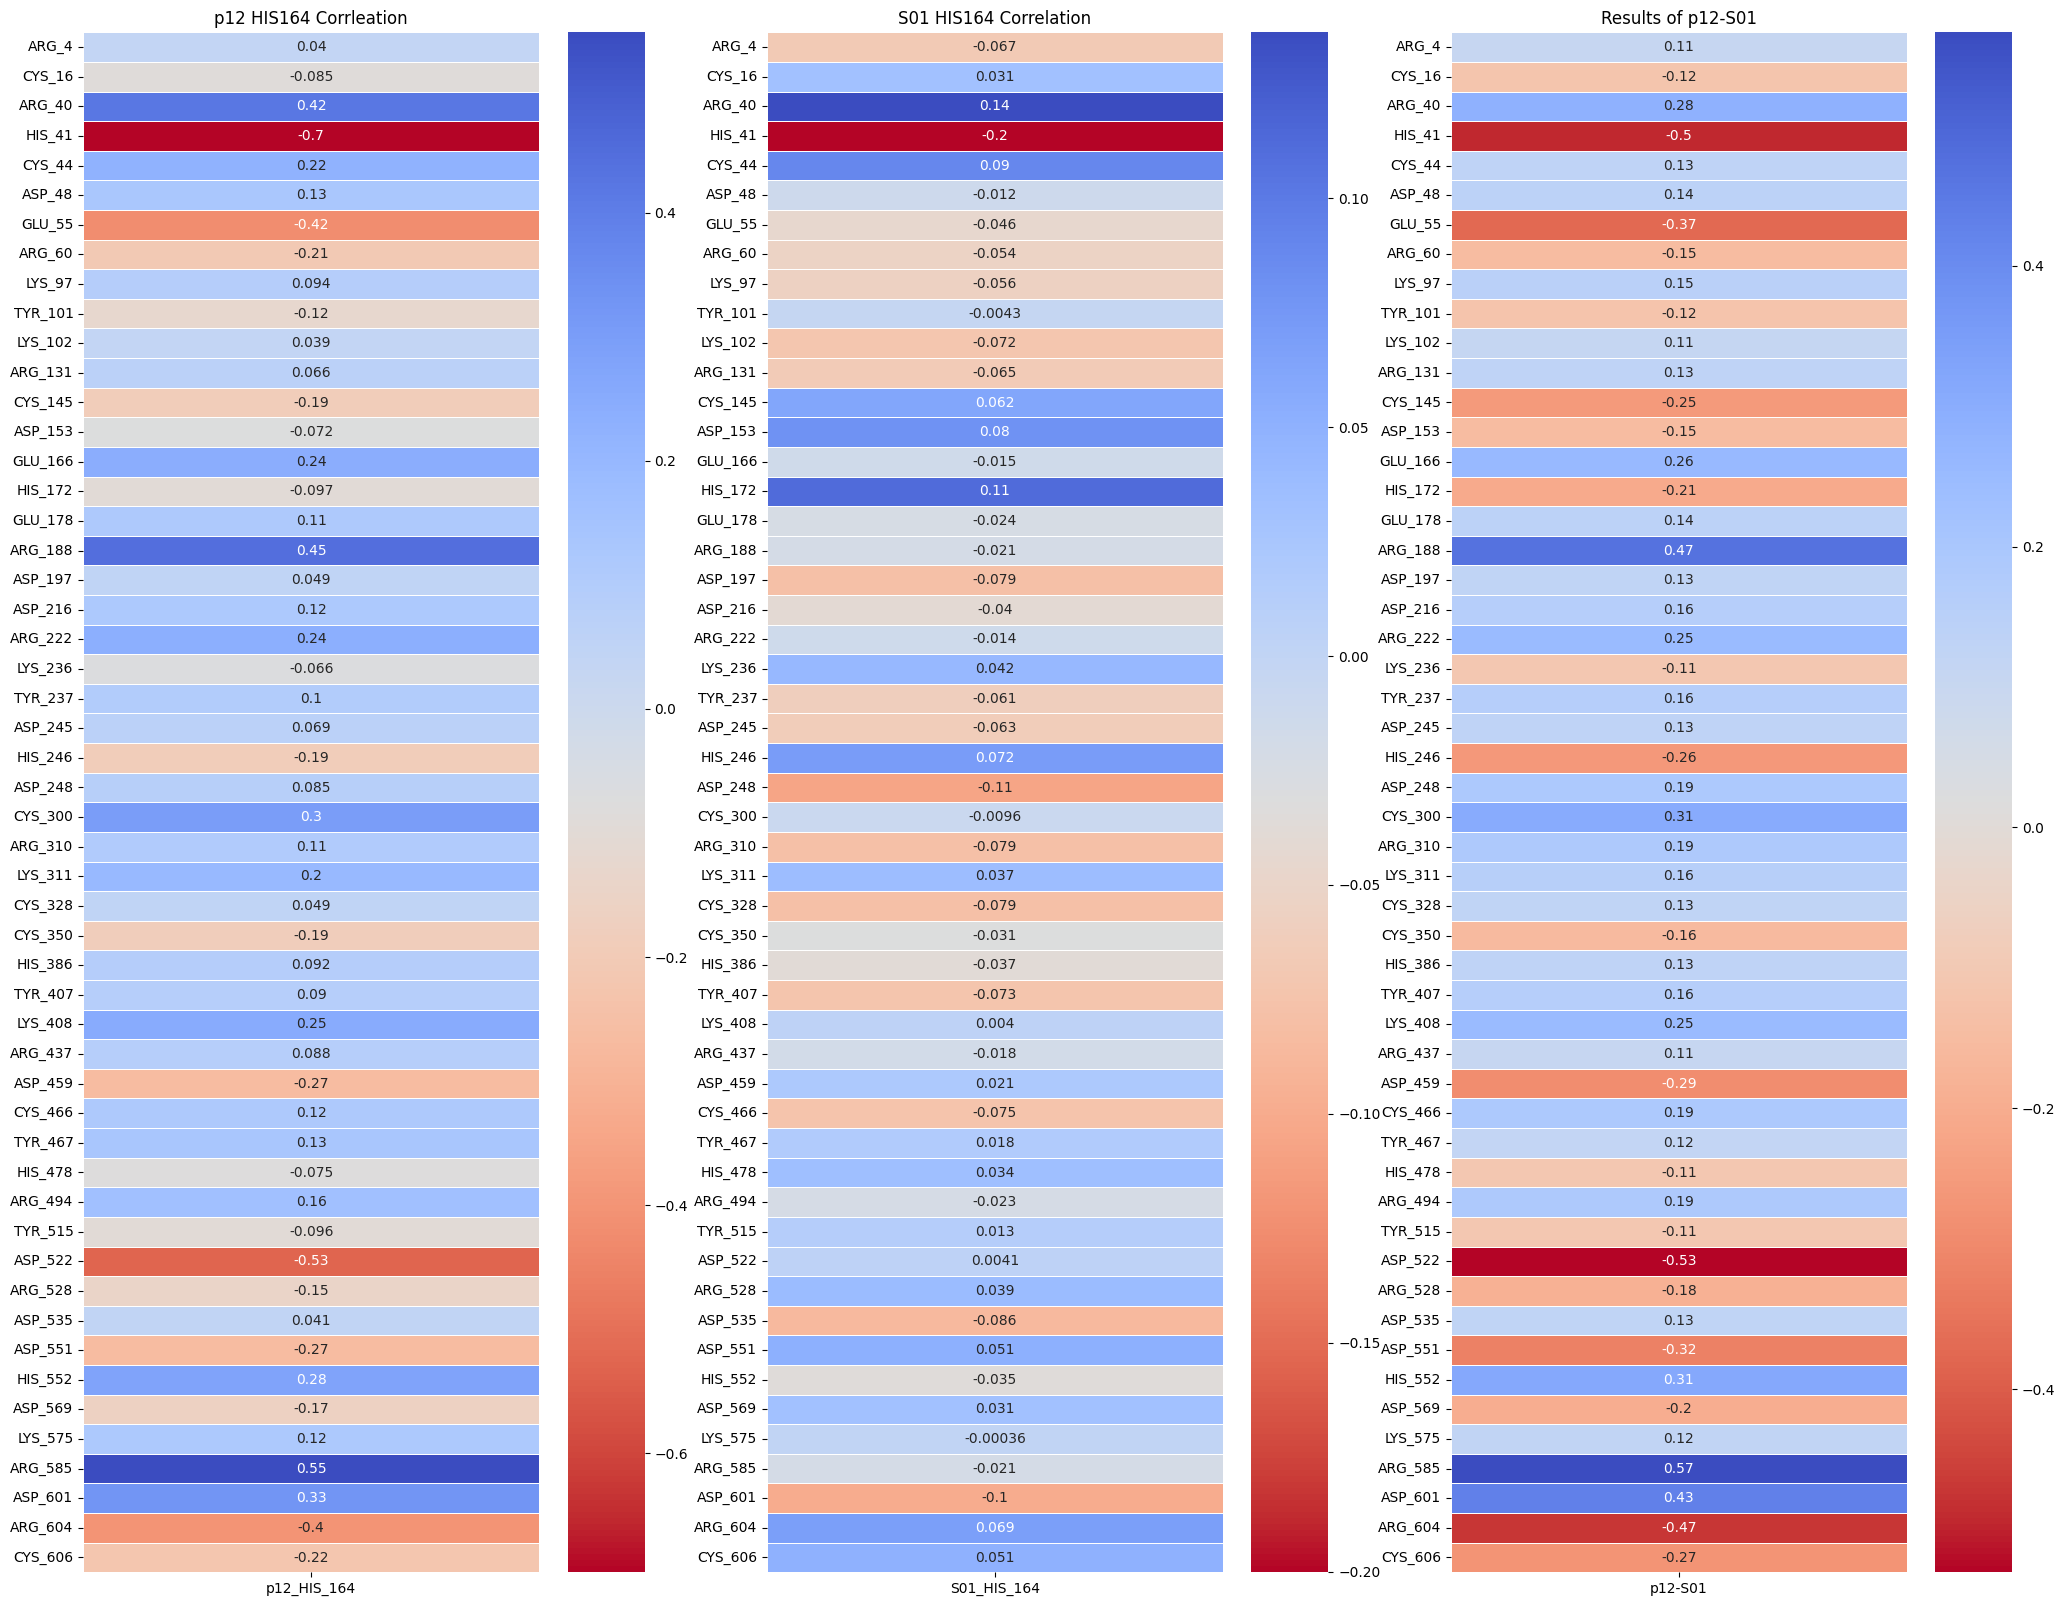

In [65]:
plt.figure(figsize=(25, 20))

plt.subplot(1, 3, 1)
plot=sns.heatmap(p12_S01_filter[["p12_HIS_164"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("p12 HIS164 Corrleation")

plt.subplot(1, 3, 2)
plot=sns.heatmap(p12_S01_filter[["S01_HIS_164"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("S01 HIS164 Correlation")

plt.subplot(1, 3, 3)
plot=sns.heatmap(p12_S01_filter[["p12-S01"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("Results of p12-S01")

plt.savefig('./figure/subtraction_example/p12_subtraction_S01.png')
plt.show()

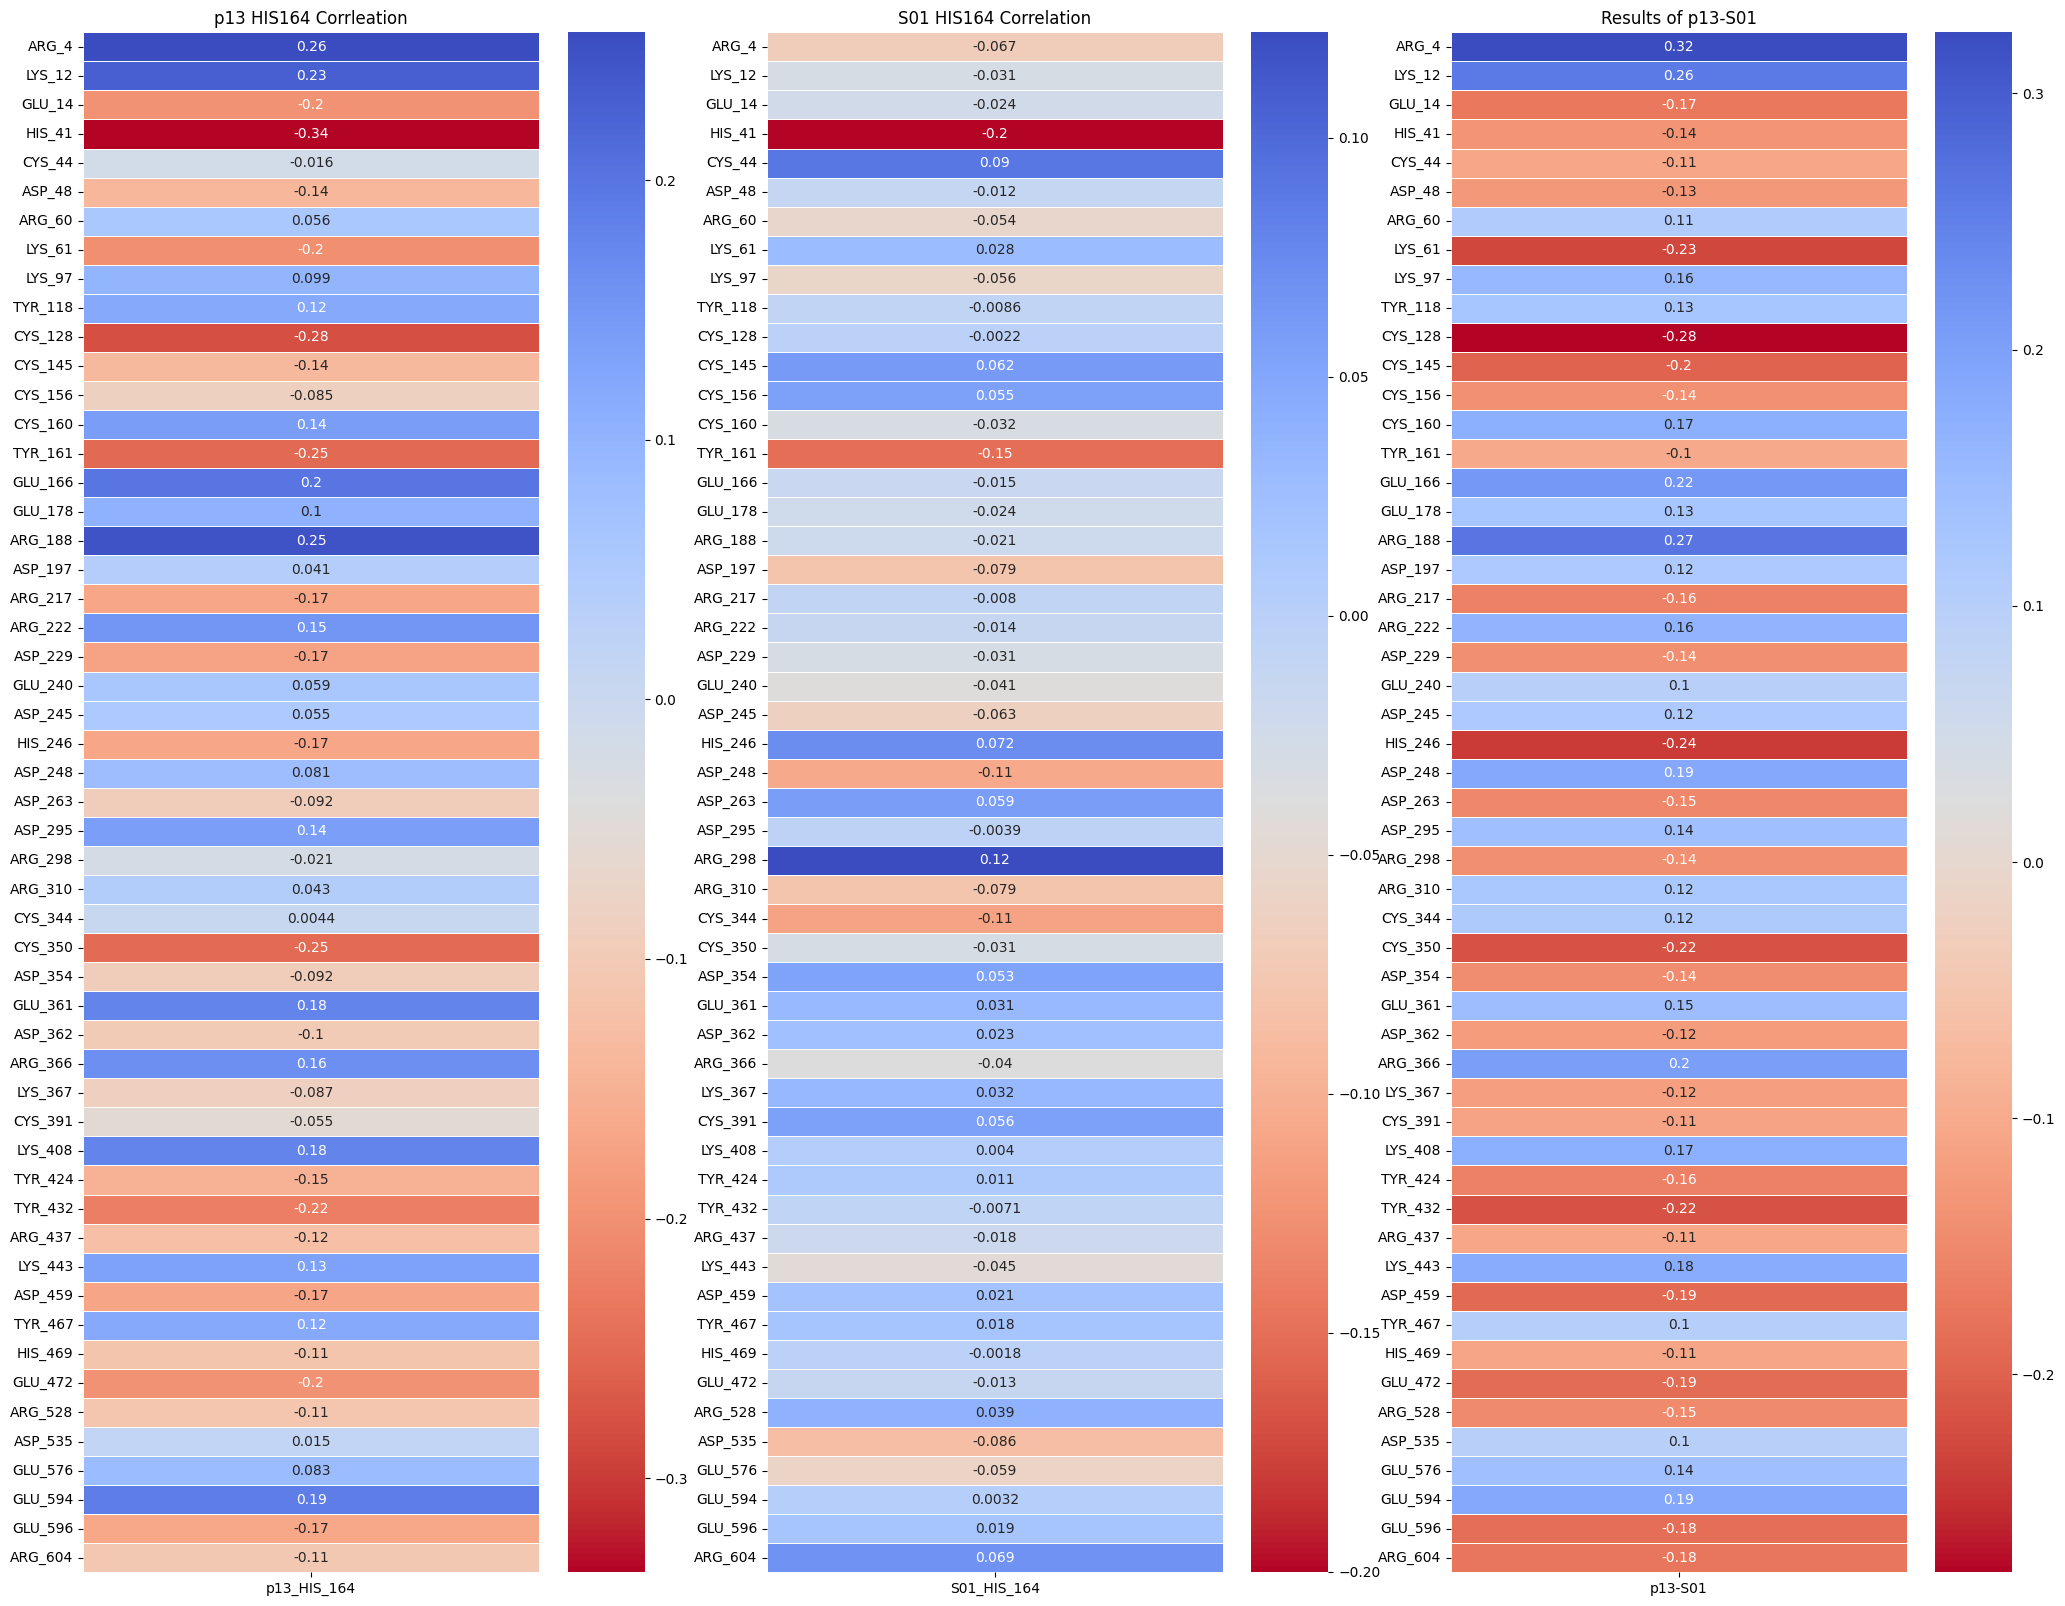

In [66]:
plt.figure(figsize=(25, 20))

plt.subplot(1, 3, 1)
plot=sns.heatmap(p13_S01_filter[["p13_HIS_164"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("p13 HIS164 Corrleation")

plt.subplot(1, 3, 2)
plot=sns.heatmap(p13_S01_filter[["S01_HIS_164"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("S01 HIS164 Correlation")

plt.subplot(1, 3, 3)
plot=sns.heatmap(p13_S01_filter[["p13-S01"]], linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title("Results of p13-S01")

plt.savefig('./figure/subtraction_example/p13_subtraction_S01.png')
plt.show()